# Augment Audio Using AudioFile

In [1]:
import IPython.display as ipd
from AudioFile import AudioFile

from pathlib import Path

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

def show_waveform(a: AudioFile):
    plt.figure()
    plt.ylim((-1., 1.))
    librosa.display.waveplot(a.samples, sr=a.sr)

### Load Two Audio Files

In [3]:
a = AudioFile(path='./example_audio/p232_013_clean.wav')
print('file: {}, sr: {}'.format(a.filename, a.sr))
show_waveform(a)
ipd.Audio(data=a.samples, rate=a.sr, normalize=False)

file: p232_013_clean.wav, sr: 16000


In [4]:
b = AudioFile(path='./example_audio/p257_101_clean.wav')
print('file: {}, sr: {}'.format(a.filename, a.sr))
show_waveform(b)
ipd.Audio(data=b.samples, rate=b.sr, normalize=False)

file: p232_013_clean.wav, sr: 16000


### Scale Amplitude

In [5]:
c = a.copy()
c.scale(0.25)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Normalize Amplitude

In [6]:
c = a.copy()
c.normalize()
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Digital Clipping

In [7]:
c = a.copy()
c.clip(3.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Pad with Silence

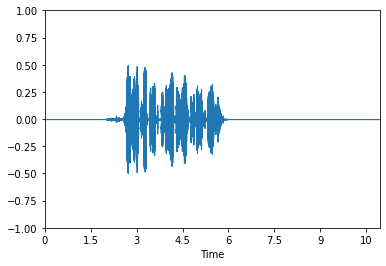

In [8]:
c = a.copy()
c.add_silence(sec_before=2.0, sec_after=5.0)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Stretch Time/Pitch

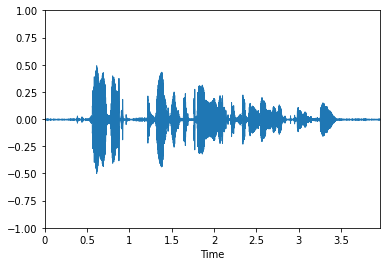

In [9]:
c = b.copy()
c.varispeed(1.0875)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files Sequentially

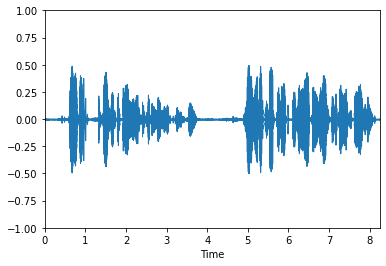

In [10]:
c = b.copy()
c.mix(a)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files with Overlap

In [11]:
c = b.copy()
c.mix(a.copy().scale(.75), relative_start=.65)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Combine Files with Silence

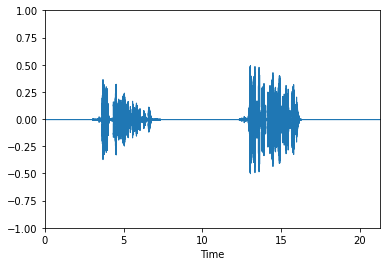

In [12]:
c = b.copy()
c.scale(.75).add_silence(sec_before=3.0)
c.mix(a.copy().add_silence(sec_before=5.0, sec_after=5.0))
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Low-Pass Filter

In [13]:
c = a.copy()
c.lpf(2000, 5)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Convolution Reverb

In [14]:
c = a.copy()
ir = Path('./IMreverbs').joinpath('Highly Damped Large Room.wav')
ir = AudioFile(ir)

c.conv_reverb(ir, wet_mix=0.075, predelay=65)

show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

### Real-World Example - Method Chaining

Create new clean file with multiple speakers

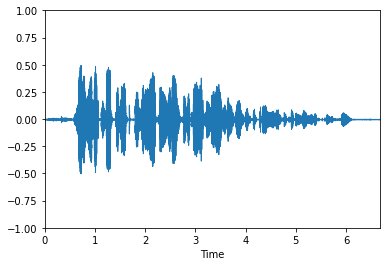

In [15]:
c = a.copy()
c.mix(b.copy().scale(0.4), relative_start=0.6)
show_waveform(c)
ipd.Audio(data=c.samples, rate=c.sr, normalize=False)

Create new noisy file - transformations can be applied through method chaining to create more complex transformations

* add reverb to simulate speakers in a live room
* remove high-freq content to simulate speaker at a distance
* add make-up gain after lpf
* use digital clipping to simulate poor recording quality

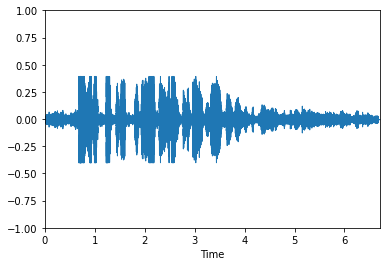

In [20]:
noise = AudioFile(Path('./example_audio/audience_noise_mono.wav'))
noise.scale(0.75)

d = c.copy()

d.mix(noise, relative_start=0.0, maintain_length=True)
d.conv_reverb(ir, wet_mix=0.025, predelay=35) \
    .lpf(500) \
    .scale(1.5) \
    .clip(1.5)

show_waveform(d)
ipd.Audio(data=d.samples, rate=d.sr, normalize=False)